In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st

#### 1.) Load in and clean the data from your classmates.

In [10]:
class_data = pd.read_csv("MCB_160L_F21_Lab_11_class_data.csv",
                         skiprows=1,
                         header=[0, 1]).dropna()
# pull list of genes
genes = ["juIs76", "juIs76; unc-40", "juIs76; unc-6", "juIs76; unc-6"]
for gene in genes:
    # for each gene, calculate the percent of defective worms
    pct_defect = class_data.loc[:, (gene, "Abnormal DD/VD")].values/class_data.loc[:, gene].values.sum(axis=1)
    class_data[(gene, "Percent Defective")] = pct_defect
class_data.sort_index(axis=1, inplace=True)

#### 2.) Calculate the mean and standard deviation of the % pathfinding defects for each genotype.

In [11]:
for gene in genes:
    print("Gene [" + gene + "]:")
    print("\t mean pct pathfinding defects: %.3f" % class_data[(gene, "Percent Defective")].mean())
    print("\t std pct pathfinding defects: %.3f\n" % class_data[(gene, "Percent Defective")].std())

Gene [juIs76]:
	 mean pct pathfinding defects: 0.025
	 std pct pathfinding defects: 0.048

Gene [juIs76; unc-40]:
	 mean pct pathfinding defects: 0.484
	 std pct pathfinding defects: 0.192

Gene [juIs76; unc-6]:
	 mean pct pathfinding defects: 0.864
	 std pct pathfinding defects: 0.075

Gene [juIs76; unc-6]:
	 mean pct pathfinding defects: 0.864
	 std pct pathfinding defects: 0.075



#### Make a bar graph of the means with error bars (include this in your lab report)

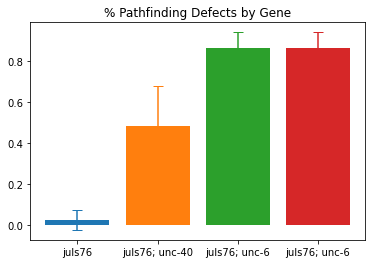

In [18]:
fig, ax = plt.subplots(1)
for gene, i in zip(genes, range(len(genes))):
      # plot bar of the average percent defective for the gene
      ax.bar(i, class_data[(gene, "Percent Defective")].mean())
      # plot errorbar for the standard deviation of percent defective for the gene
      ax.errorbar(i, class_data[(gene, "Percent Defective")].mean(),
                  class_data[(gene, "Percent Defective")].std(),
                  capsize=5
                  )
ax.set_xticks(range(len(genes)))
ax.set_xticklabels(genes)
ax.set_title("% Pathfinding Defects by Gene")
plt.show()

#### Run an independent t-test (2-tailed, assuming equal variance) to compare the % pathfinding effects between each genotype.

In [13]:
from itertools import combinations
for gene_1, gene_2 in combinations(genes, 2):
    # for each pair of genes, compute at 2-tailed t-test, assuming pooled variance.
    t_test_results = st.ttest_ind(a=class_data[(gene_1, "Percent Defective")],
                        b=class_data[(gene_2, "Percent Defective")],
                        equal_var=True)
    print("Comparison of % Pathfinding Defects in [" + gene_1 + "] vs [" + gene_2 + "]")
    print("\t t-statistic: %.3f" % t_test_results[0])
    print("\t p-value: %.3e\n" % t_test_results[1])

Comparison of % Pathfinding Defects in [juIs76] vs [juIs76; unc-40]
	 t-statistic: -9.560
	 p-value: 6.733e-11

Comparison of % Pathfinding Defects in [juIs76] vs [juIs76; unc-6]
	 t-statistic: -38.947
	 p-value: 1.558e-28

Comparison of % Pathfinding Defects in [juIs76] vs [juIs76; unc-6]
	 t-statistic: -38.947
	 p-value: 1.558e-28

Comparison of % Pathfinding Defects in [juIs76; unc-40] vs [juIs76; unc-6]
	 t-statistic: -7.620
	 p-value: 1.107e-08

Comparison of % Pathfinding Defects in [juIs76; unc-40] vs [juIs76; unc-6]
	 t-statistic: -7.620
	 p-value: 1.107e-08

Comparison of % Pathfinding Defects in [juIs76; unc-6] vs [juIs76; unc-6]
	 t-statistic: 0.000
	 p-value: 1.000e+00

